#**Support Vector Machine - Classification (Scratch)**

###**Kernels in SVM:**
- **Linear:** For linearly separable data.
- **Polynomial:** For polynomial relationships in data.
- **RBF (Gaussian):** For highly non-linear data, most popular in real-world applications.
- **Sigmoid:** Similar to neural network activations, used for non-linear relationships.
- **Custom:** For special use cases with specific domain knowledge.

###**Loss Functions of SVM:**
- Hinge Loss and Squared Hinge Loss are widely used for their effectiveness in creating a large margin.
- Logistic Loss provides a probabilistic interpretation and smoother optimization.
- Zero-One Loss is less practical due to optimization challenges.
- Soft Margin Loss is practical for handling real-world data where perfect separation may not be possible.

**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_diabetes, load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, explained_variance_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

**Code**

In [3]:
class SVM:
    def __init__(self, kernel='linear', C=1.0, loss='hinge', degree=3, gamma='scale', n_epochs=10, learning_rate=0.01):
        self.kernel = kernel
        self.C = C
        self.loss_function = loss
        self.degree = degree
        self.gamma = gamma
        self.n_epochs = n_epochs
        self.learning_rate = learning_rate
        self.models = []
        self.class_labels = None
        self.X_train = None

    def _kernel(self, X1, X2):
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel == 'polynomial':
            return (np.dot(X1, X2.T) + 1) ** self.degree
        elif self.kernel == 'rbf':
            if self.gamma == 'scale':
                self.gamma = 1 / X1.shape[1]  # Default scale
            diff = X1[:, np.newaxis, :] - X2[np.newaxis, :, :]
            return np.exp(-self.gamma * np.sum(diff ** 2, axis=2))
        else:
            raise ValueError("Unknown kernel type.")

    def _hinge_loss(self, linear_output, y):
        return np.maximum(0, 1 - y * linear_output)

    def _squared_hinge_loss(self, linear_output, y):
        return np.square(np.maximum(0, 1 - y * linear_output))

    def _logistic_loss(self, linear_output, y):
        return np.log(1 + np.exp(-y * linear_output))

    def fit(self, X, y):
        self.class_labels = np.unique(y)
        self.X_train = X

        total_losses = np.zeros((self.n_epochs, len(self.class_labels)))
        self.models = []

        for class_id, class_label in enumerate(self.class_labels):
            binary_y = np.where(y == class_label, 1, -1)  # Convert labels to -1, 1
            alpha = np.zeros(X.shape[0])
            b = 0

            # Training loop
            for epoch in range(self.n_epochs):
                epoch_loss = 0

                for i in range(len(binary_y)):
                    K = self._kernel(X[i:i + 1], X)  # Compute the kernel for the current sample
                    linear_output = np.sum(alpha * binary_y * K) - b

                    # Call the appropriate loss function
                    if self.loss_function == 'hinge':
                        loss = self._hinge_loss(linear_output, binary_y[i])
                    elif self.loss_function == 'squared_hinge':
                        loss = self._squared_hinge_loss(linear_output, binary_y[i])
                    elif self.loss_function == 'logistic':
                        loss = self._logistic_loss(linear_output, binary_y[i])
                    else:
                        raise ValueError("Unknown loss function.")

                    epoch_loss += loss

                    # Update alpha and b using gradients
                    if loss > 0:
                        alpha[i] += self.learning_rate * self.C * binary_y[i]  # Update alpha
                        b -= self.learning_rate * self.C * binary_y[i]  # Update bias

                # Store total loss for the epoch and class
                total_losses[epoch, class_id] = epoch_loss

            self.models.append((alpha, b))

        # Print average loss for each epoch
        for epoch in range(self.n_epochs):
            average_loss = np.mean(total_losses[epoch])
            print(f"Epoch {epoch + 1}/{self.n_epochs}, Average {self.loss_function.capitalize()} Loss: {average_loss:.2f}")

    def predict(self, X):
        class_scores = np.zeros((X.shape[0], len(self.class_labels)))

        for i, (alpha, b) in enumerate(self.models):
            K = self._kernel(X, self.X_train)  # Compute kernel between test points and training points
            class_scores[:, i] = np.sum(alpha * (K * (np.where(y_train == self.class_labels[i], 1, -1))), axis=1) - b

        return np.argmax(class_scores, axis=1)

**Load Dataset**

In [4]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

In [5]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

In [6]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Train
svm_model = SVM(kernel='rbf', C=1.0, loss='hinge', degree=3, gamma='scale', n_epochs=10, learning_rate=0.01)
svm_model.fit(X_train, y_train)

Epoch 1/10, Average Hinge Loss: 105.02
Epoch 2/10, Average Hinge Loss: 104.99
Epoch 3/10, Average Hinge Loss: 104.96
Epoch 4/10, Average Hinge Loss: 104.93
Epoch 5/10, Average Hinge Loss: 104.90
Epoch 6/10, Average Hinge Loss: 104.87
Epoch 7/10, Average Hinge Loss: 104.84
Epoch 8/10, Average Hinge Loss: 104.81
Epoch 9/10, Average Hinge Loss: 104.77
Epoch 10/10, Average Hinge Loss: 104.74


In [8]:
# Make predictions
y_pred = svm_model.predict(X_test)
print(y_pred[:5])

[1 1 1 1 1]


In [9]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print overall metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.29
Precision: 0.08
Recall: 0.29
F1 Score: 0.13
Confusion Matrix:
 [[ 0 19  0]
 [ 0 13  0]
 [ 0 13  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.29      1.00      0.45        13
           2       0.00      0.00      0.00        13

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [10]:
# Visualization function
def plot_decision_boundary(X, y, model, title):
    # Create a mesh grid for visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, label='Data Points')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.show()

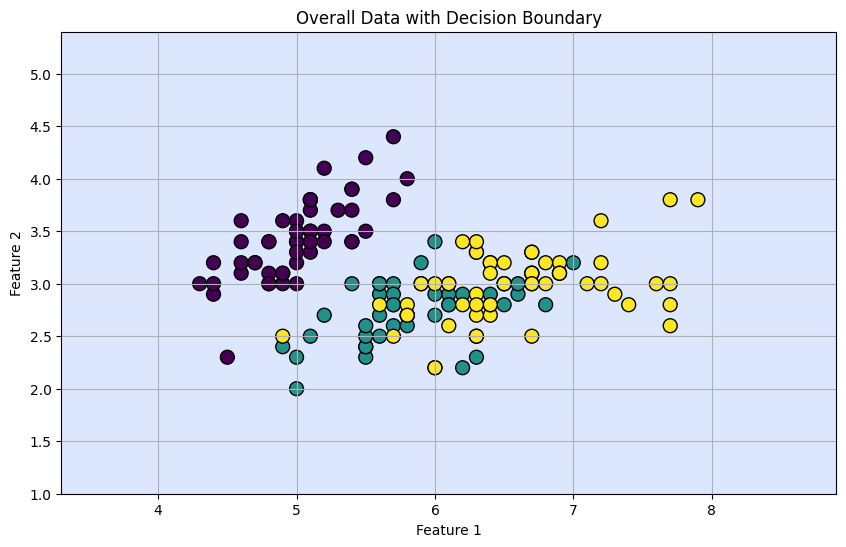

In [11]:
# Visualize Overall Data
plot_decision_boundary(X, y, svm_model, title='Overall Data with Decision Boundary')

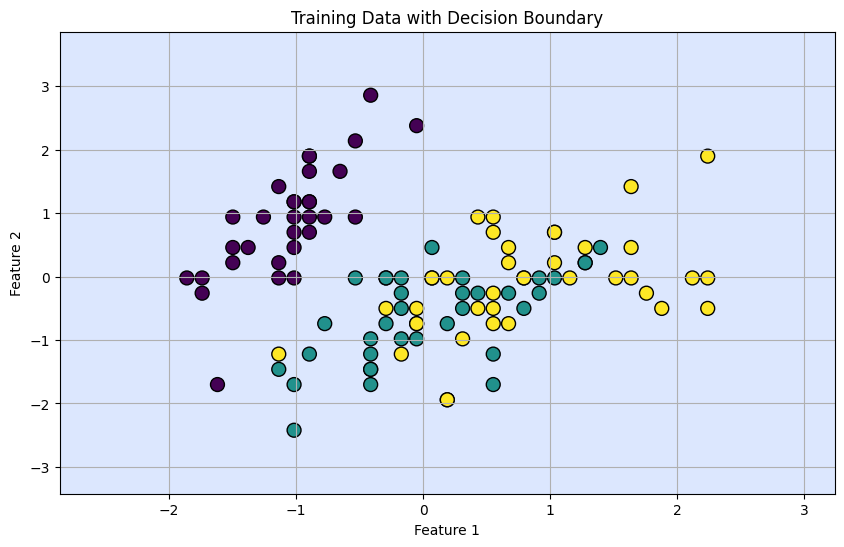

In [12]:
# Visualize Training Data
plot_decision_boundary(X_train, y_train, svm_model, title='Training Data with Decision Boundary')

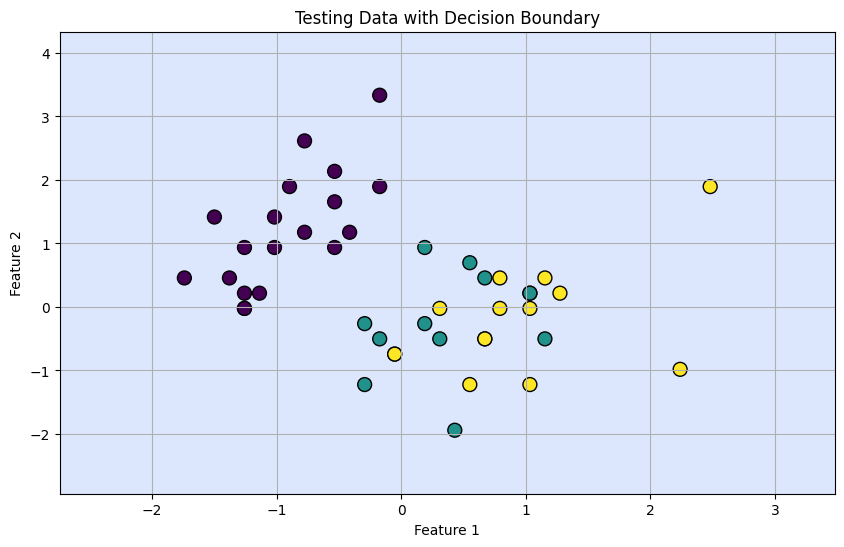

In [13]:
# Visualize Testing Data
plot_decision_boundary(X_test, y_test, svm_model, title='Testing Data with Decision Boundary')